In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import h5py
from collections import Counter

In [28]:
PATHFD='d:\\SND\\artem\\val\\'
with h5py.File(PATHFD+'data.h5', 'r') as df:

     print(df.keys())
     tr_ids = df['ids/train'][...]
     test_ids = df['ids/test'][...]
     val_ids=df['ids/val'][...]
     tr_lab = df['label/train'][...]
     test_lab = df['label/test'][...]
     val_lab = df['label/val'][...]


<KeysViewHDF5 ['ds', 'event_metadata', 'ids', 'label', 'scifi', 'us']>


317702
[     3      7     13 ... 317671 317697 317701]
[     1      4      5 ... 317695 317698 317700]
[     0      2      6 ... 317694 317696 317699]
train:
(array([0, 1, 2]), array([ 50119, 162970,  69877], dtype=int64))
test:
(array([0, 1, 2]), array([ 5552, 18137,  7752], dtype=int64))
valid:
(array([     1,     12,     13, ..., 317674, 317693, 317697]), array([1, 1, 1, ..., 1, 1, 1], dtype=int64))


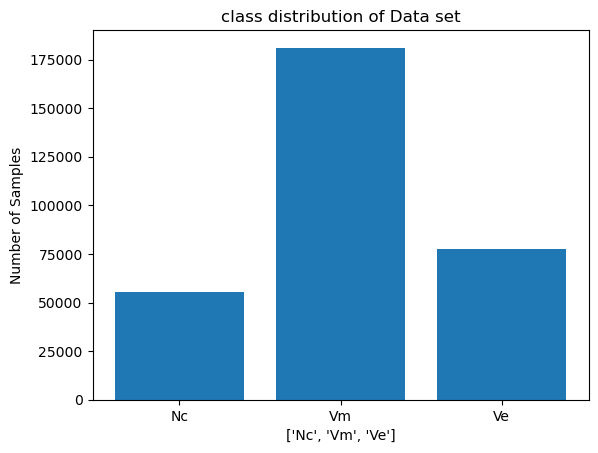

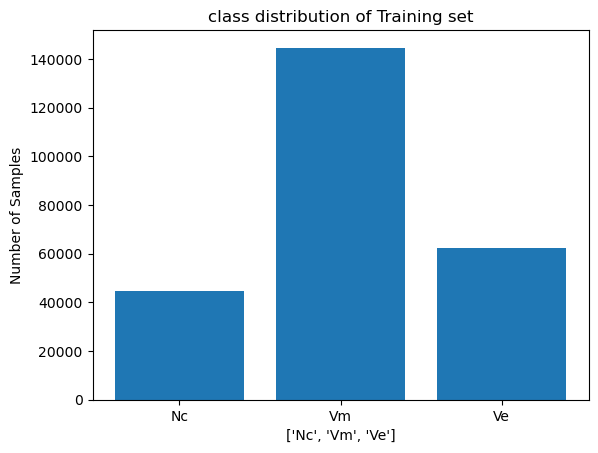

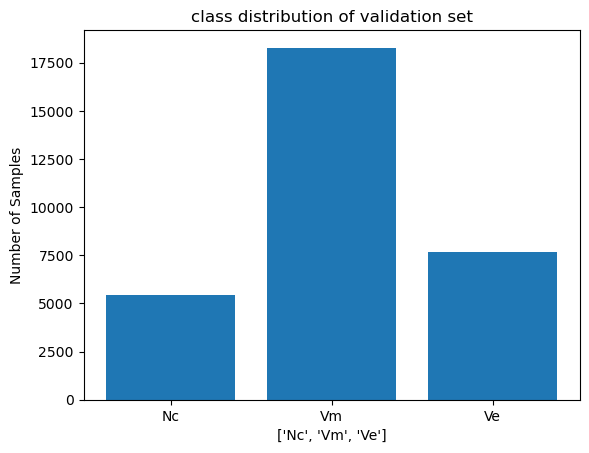

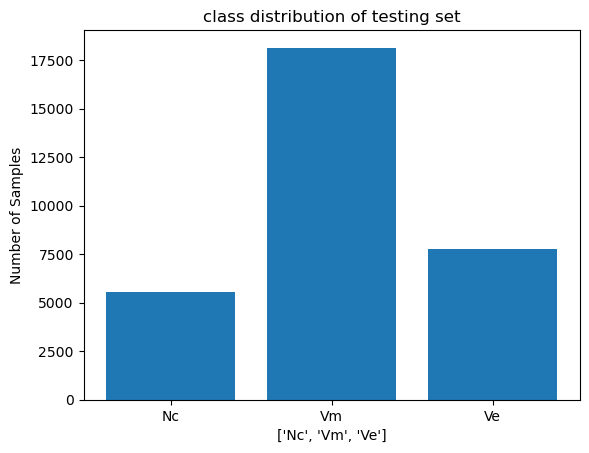

In [34]:
wall_coords = [0, 300.+1, 313.+1, 326.+1, 339.+1, 352.+3]
with h5py.File(PATHFD+'data.h5', 'r') as df:
    metadata = df['event_metadata'][...]

map_ve = (np.abs(metadata[:,1])==12) * (np.abs(metadata[:,2])!=12)
map_nc = (np.abs(metadata[:,1])==np.abs(metadata[:,2]))# * ((np.abs(metadata[:,1])!=12))
map_vm_cc = (np.abs(metadata[:,1])==14) * (np.abs(metadata[:,2])!=14)
df.close()
print(len(map_nc))

from sklearn.model_selection import train_test_split


# In[57]:


def which_wall(pos, wall_coords):
    for i in range(5):
        if (pos>wall_coords[i]) and (pos<wall_coords[i+1]):
            return i
    return -1


# In[66]:


ids_ve = np.arange(metadata.shape[0])[map_ve]
ids_nc = np.arange(metadata.shape[0])[map_nc]
ids_vm_cc = np.arange(metadata.shape[0])[map_vm_cc]
print(ids_ve)
print(ids_nc)
print(ids_vm_cc)
all_ids = np.concatenate((ids_ve, ids_vm_cc, ids_nc))
all_labels = np.concatenate((np.ones_like(ids_ve)*0, np.ones_like(ids_vm_cc)*1, np.ones_like(ids_nc)*2))
all_walls = np.array([which_wall(metadata[id_ev, 0], wall_coords) for id_ev in all_ids])
if np.any(all_walls<0): print(all_ids[all_walls<0], '\n', metadata[all_ids[all_walls<0], 0], '\n', metadata[all_ids[all_walls<0], 1])

test_size = 0.1
tr_ids, test_ids, tr_lab, test_lab = train_test_split(all_ids, all_labels, test_size=test_size, shuffle=True)
print('train:')
print(np.unique(tr_lab, return_counts=True))
print('test:')
print(np.unique(test_lab, return_counts=True))

tr_ids, val_ids, tr_lab, val_lab = train_test_split(tr_ids, tr_lab, test_size=0.111, shuffle=True)  #90*0.111=10
print('valid:')
print(np.unique(val_ids, return_counts=True))

keys=['Nc','Vm', 'Ve']


count= np.unique(all_labels, return_counts=True)
count=count[1]


plt.bar(keys,count)
plt.xlabel(keys)
plt.ylabel('Number of Samples')
plt.title('class distribution of Data set')
plt.show();



count= np.unique(tr_lab, return_counts=True)
count=count[1]


plt.bar(keys,count)
plt.xlabel(keys)
plt.ylabel('Number of Samples')
plt.title('class distribution of Training set')
plt.show();
count= np.unique(val_lab, return_counts=True)
count=count[1]

plt.bar(keys,count)
plt.xlabel(keys)
plt.ylabel('Number of Samples')
plt.title('class distribution of validation set')
plt.show();

count= np.unique(test_lab, return_counts=True)
count=count[1]
plt.bar(keys,count)
plt.xlabel(keys)
plt.ylabel('Number of Samples')
plt.title('class distribution of testing set')
plt.show();



In [16]:

#PATHF=PATHFD='d:\\SND\\'
#with open(PATHF+'trainHistoryDictf', "rb") as file_pi:
#    hist = pickle.load(file_pi)

#print(hist.keys())


In [3]:
import pickle
with open('d:\\SND\\artem\\val\\ddata40', "rb") as file_pi:
    hist = pickle.load(file_pi)
#print(hist['y_class_categorical_accuracy'])
print(hist.keys())

keys=['NC','Vm', 'Ve']

dict_keys(['loss', 'y_class_loss', 'y_wall_loss', 'y_class_categorical_accuracy', 'y_wall_categorical_accuracy', 'val_loss', 'val_y_class_loss', 'val_y_wall_loss', 'val_y_class_categorical_accuracy', 'val_y_wall_categorical_accuracy'])


In [28]:
y={'d':[1,2,3,4,5,6],'f':[3 ,5,6]}
print(y['f'])

[3, 5, 6]


In [4]:
with open('d:\\SND\\artem\\val\\rdata40', "rb") as file_pi:
    rd = pickle.load(file_pi)
 

In [16]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
PATHF='d:\\SND\\artem\\val\\'
print(PATHF)
with open(PATHF+'trainHistoryDictf', "rb") as file_pi:
    hist = pickle.load(file_pi)

with open(PATHF+'rdata40', "rb") as file_pi:
    val = pickle.load(file_pi)

#the variable may be switched from [ve, NC, Vm] to [NC,Vm,Ve] 
cm=val[2]['classLevelaccuracy']
#for i in val[0]:
#    print(i)
#f= cm.astype('float') / cm.sum(axis=0)[:, np.newaxis]
def pre_rec(cm):
    f=cm.sum(axis=0)
    fd=np.diag(cm)
    precision=np.divide(fd,f)
    f=cm.sum(axis=1)
    recall=np.divide(fd,f)
    return([precision,recall])
d=[]
 
#print(d1['dic'])
lop=['classLevelaccuracy','classLevelaccuracytr']
precision=[]
recall=[]
precisiont=[]
pve=[]
pnc=[]
pvm=[]
rve=[]
rnc=[]
rvm=[]
tve=[]
tnc=[]
tvm=[]
rtve=[]
rtnc=[]
rtvm=[]
recallt=[]
#prec=[]
print(len(val[:]))
for i in range(len(val[:])-1):
    cm=val[i]['classLevelaccuracy']
    d=pre_rec(cm)
  
    #prec = np.concatenate([prec, d[0]])
    pve.append(d[0][0]) 
    pnc.append(d[0][1])
    pvm.append(d[0][2])
    #prec.append({'dicc':d[0],})
    rve.append(d[1][0]) 
    rnc.append(d[1][1])
    rvm.append(d[1][2])
    
    precision.append(d[0])
    recall.append(d[1])
    cm=val[i]['classLevelaccuracytr']
    
    d=pre_rec(cm)
    tve.append(d[0][0]) 
    tnc.append(d[0][1])
    tvm.append(d[0][2])
    
    rtve.append(d[1][0]) 
    rtnc.append(d[1][1])
    rtvm.append(d[1][2])
    
    precisiont.append(d[0],)
    
    recallt.append(d[1],)
 
  
#print(precision)
#dd=np.concatenate(precision)
#de=np.concatenate(pve)

dic_prec={'classLevelaccuracy':precision}
dic_recall={'classLevelaccuracy':recall}
dic_prect={'classLevelaccuracytr':precisiont}
dic_recallt={'classLevelaccuracytr':recallt}
#print(precision[0][1])
#print(hist['loss'])
#print(np.concatenate(precision[4],precision[2]))
#print(dic_recall['classLevelaccuracy'][1:6])
#print(dic_prect['classLevelaccuracytr'][1:6])
#print(dic_recallt['classLevelaccuracytr'][1:6])
 

d:\SND\artem\val\
40


In [10]:
cm=val[23]['classLevelaccuracy']
fv=cm.sum(axis=0)
cmtr=val[23]['classLevelaccuracytr']
rp=val[39]['report']
print(rp)
f=cmtr.sum(axis=0)
f1=cmtr.sum(axis=1)
print(cm)
print (fv)
fv1=cm.sum(axis=1)
print(fv1)


              precision    recall  f1-score   support

           0       0.70      0.68      0.69      5504
           1       0.93      0.91      0.92     18155
           2       0.69      0.74      0.71      7751

    accuracy                           0.83     31410
   macro avg       0.77      0.78      0.78     31410
weighted avg       0.83      0.83      0.83     31410

[[ 3649   299  1556]
 [  356 16514  1285]
 [  928   705  6118]]
[ 4933 17518  8959]
[ 5504 18155  7751]


### 

(0.0, 1.0)

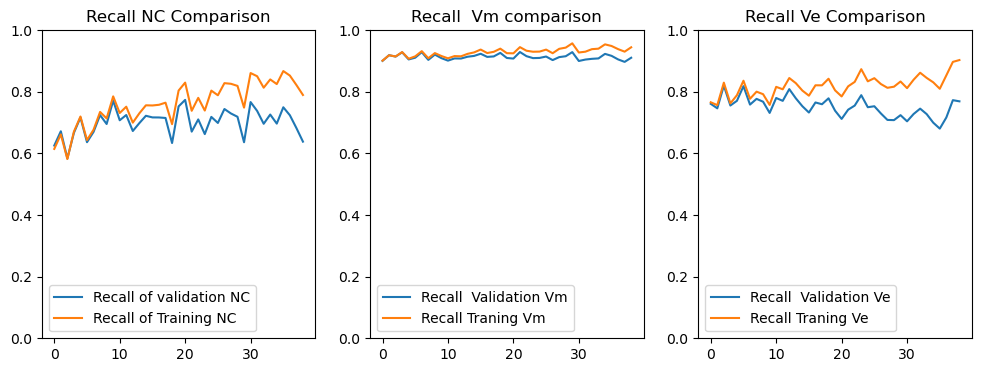

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(rve, label='Recall of validation NC')
plt.plot(rtve, label='Recall of Training NC')
plt.title('Recall NC Comparison')
plt.legend()
plt.ylim([0,1])
plt.subplot(1,3,2)
#plt.plot(history_df['accuracy'], label='training accuracy')
plt.plot(rnc, label='Recall  Validation Vm')
plt.plot(rtnc, label='Recall Traning Vm ')
plt.title('Recall  Vm comparison')
plt.legend();
plt.ylim([0,1])
plt.subplot(1,3,3)
#plt.plot(history_df['accuracy'], label='training accuracy')
plt.plot(rvm, label='Recall  Validation Ve')
plt.plot(rtvm, label='Recall Traning Ve ')
plt.title('Recall Ve Comparison')
plt.legend();
plt.ylim([0,1])

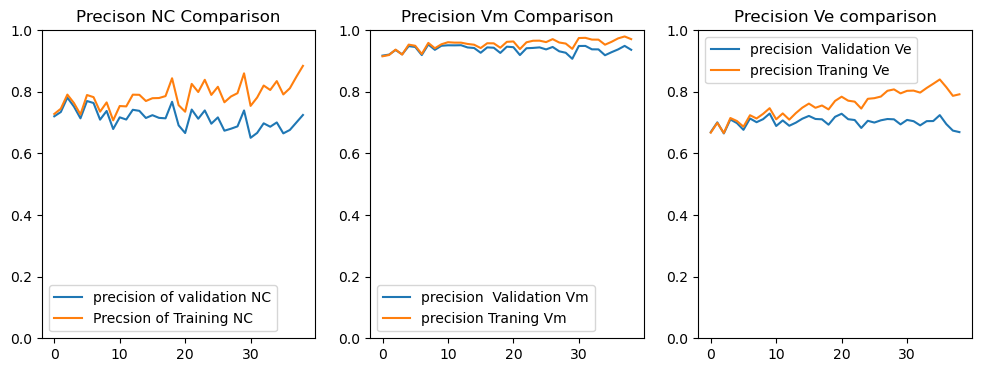

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(pve, label='precision of validation NC')
plt.plot(tve, label='Precsion of Training NC')
plt.title('Precison NC Comparison')
plt.legend()
plt.ylim([0,1])

plt.subplot(1,3,2)
#plt.plot(history_df['accuracy'], label='training accuracy')
plt.plot(pnc, label='precision  Validation Vm')
plt.plot(tnc, label='precision Traning Vm ')
plt.title('Precision Vm Comparison')

plt.ylim([0,1])
plt.legend();
plt.subplot(1,3,3)
#plt.plot(history_df['accuracy'], label='training accuracy')
plt.plot(pvm, label='precision  Validation Ve')
plt.plot(tvm, label='precision Traning Ve ')
plt.title('Precision Ve comparison')

plt.ylim([0,1])
plt.legend(); 
 

In [24]:
def f_score(precision,recall):
    f1=2*np.multiply(precision,recall)  
    f1=np.divide(f1,np.add(precision,recall))
      
    return f1

(0.0, 1.0)

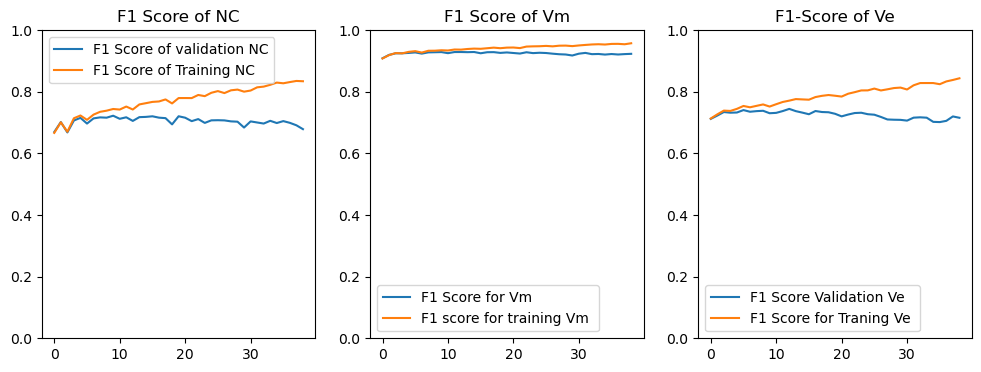

In [25]:
f1nc=f_score(pve,rve)
f1tnc=f_score(tve,rtve)
f1vm=f_score(pnc,rnc)
f1tvm=f_score(tnc,rtnc)
f1ve=f_score(pvm,rvm)
f1tve=f_score(tvm,rtvm)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)

plt.plot(f1nc, label='F1 Score of validation NC')
plt.plot(f1tnc, label='F1 Score of Training NC')
plt.title('F1 Score of NC')
plt.legend()
plt.ylim([0,1])
plt.subplot(1,3,2)
#plt.plot(history_df['accuracy'], label='training accuracy')

plt.plot(f1vm, label='F1 Score for Vm')
plt.plot(f1tvm, label='F1 score for training Vm ')
plt.title('F1 Score of Vm')
plt.legend();
plt.ylim([0,1])
plt.subplot(1,3,3)
#plt.plot(history_df['accuracy'], label='training accuracy')
plt.plot(f1ve, label='F1 Score Validation Ve')
plt.plot(f1tve, label='F1 Score for Traning Ve ')
plt.title('F1-Score of Ve')
plt.legend();
plt.ylim([0,1])

(0.0, 1.0)

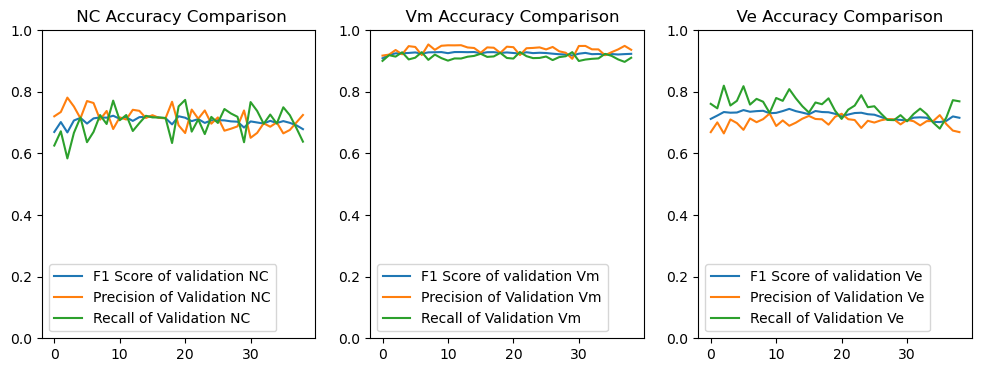

In [22]:

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)

plt.plot(f1nc, label='F1 Score of validation NC')
plt.plot(pve, label='Precision of Validation NC')
plt.plot(rve, label='Recall of Validation NC')
plt.title(' NC Accuracy Comparison')
plt.legend()
plt.ylim([0,1])
plt.subplot(1,3,2)
#plt.plot(history_df['accuracy'], label='training accuracy')

plt.plot(f1vm, label='F1 Score of validation Vm')
plt.plot(pnc, label='Precision of Validation Vm')
plt.plot(rnc, label='Recall of Validation Vm')
plt.title('  Vm Accuracy Comparison')
plt.legend();
plt.ylim([0,1])
plt.subplot(1,3,3)
#plt.plot(history_df['accuracy'], label='training accuracy')
plt.plot(f1ve, label='F1 Score of validation Ve')
plt.plot(pvm, label='Precision of Validation Ve')
plt.plot(rvm, label='Recall of Validation Ve')
plt.title('  Ve Accuracy Comparison')
plt.legend();
plt.ylim([0,1])

(0.0, 1.0)

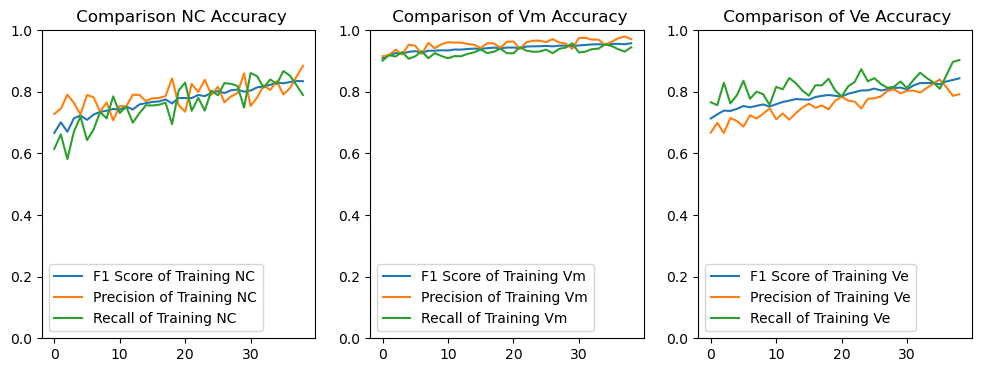

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)

plt.plot(f1tnc, label='F1 Score of Training NC')
plt.plot(tve, label='Precision of Training NC')
plt.plot(rtve, label='Recall of Training NC')
plt.title(' Comparison NC Accuracy')
plt.legend()
plt.ylim([0,1])
plt.subplot(1,3,2)
#plt.plot(history_df['accuracy'], label='training accuracy')

plt.plot(f1tvm, label='F1 Score of Training Vm')
plt.plot(tnc, label='Precision of Training Vm')
plt.plot(rtnc, label='Recall of Training Vm')
plt.title(' Comparison of Vm Accuracy')
plt.legend();
plt.ylim([0,1])
plt.subplot(1,3,3)
#plt.plot(history_df['accuracy'], label='training accuracy')
plt.plot(f1tve, label='F1 Score of Training Ve')
plt.plot(tvm, label='Precision of Training Ve')
plt.plot(rtvm, label='Recall of Training Ve')
plt.title(' Comparison of Ve Accuracy')
plt.legend();
plt.ylim([0,1])

(0.0, 1.0)

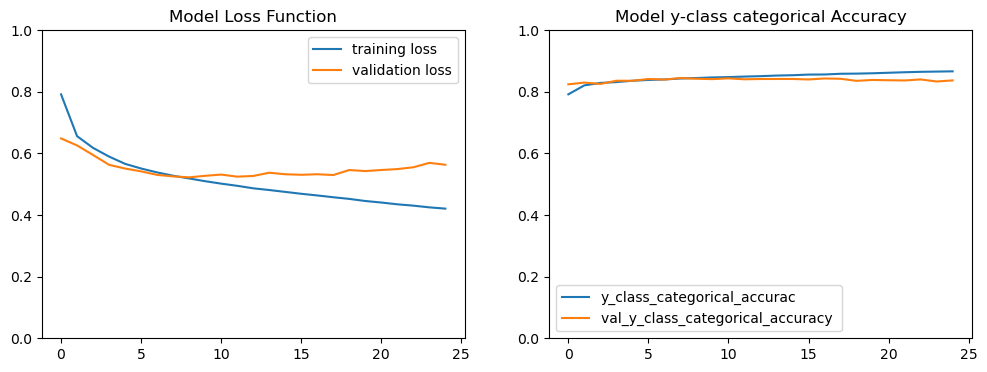

In [53]:
#history_df = pd.DataFrame(hist.history)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist['loss'], label='training loss')
plt.plot(hist['val_loss'], label='validation loss')
plt.title('Model Loss Function')
plt.legend()
plt.ylim([0,1])
plt.subplot(1,2,2)
#plt.plot(history_df['accuracy'], label='training accuracy')
plt.plot(hist['y_class_categorical_accuracy'], label='y_class_categorical_accurac')
plt.plot(hist['val_y_class_categorical_accuracy'], label='val_y_class_categorical_accuracy ')
plt.title('Model y-class categorical Accuracy')
plt.legend();
plt.ylim([0,1])

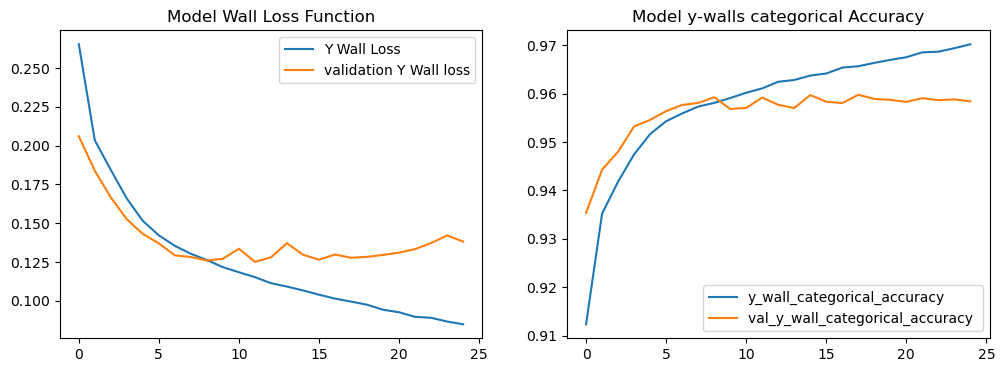

In [22]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist['y_wall_loss'], label='Y Wall Loss')
plt.plot(hist['val_y_wall_loss'], label='validation Y Wall loss')
plt.title('Model Wall Loss Function')
plt.legend()
plt.subplot(1,2,2)
#plt.plot(history_df['accuracy'], label='training accuracy')
plt.plot(hist['y_wall_categorical_accuracy'], label='y_wall_categorical_accuracy')
plt.plot(hist['val_y_wall_categorical_accuracy'], label='val_y_wall_categorical_accuracy ')
plt.title('Model y-walls categorical Accuracy')
plt.legend();